In [1]:
import pandas as pd 


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv",header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:

# Specify custom column names
df.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

# dropping id column 
df.drop("Id",axis=1,inplace=True)

In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


**Dataset has no NaN values**

In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# Visualisation of Distribution of Data

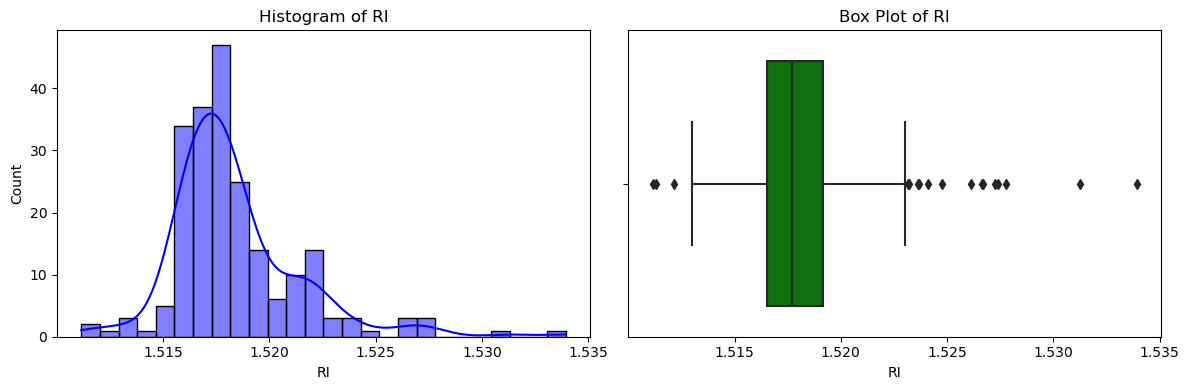

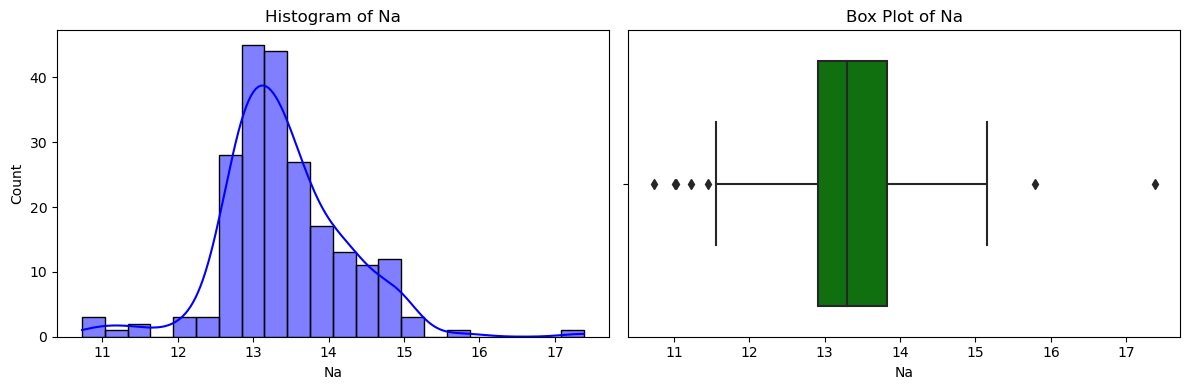

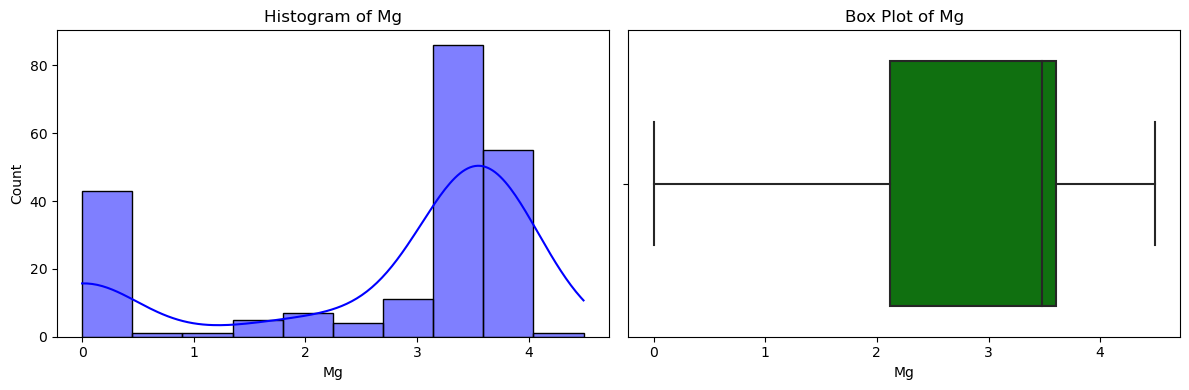

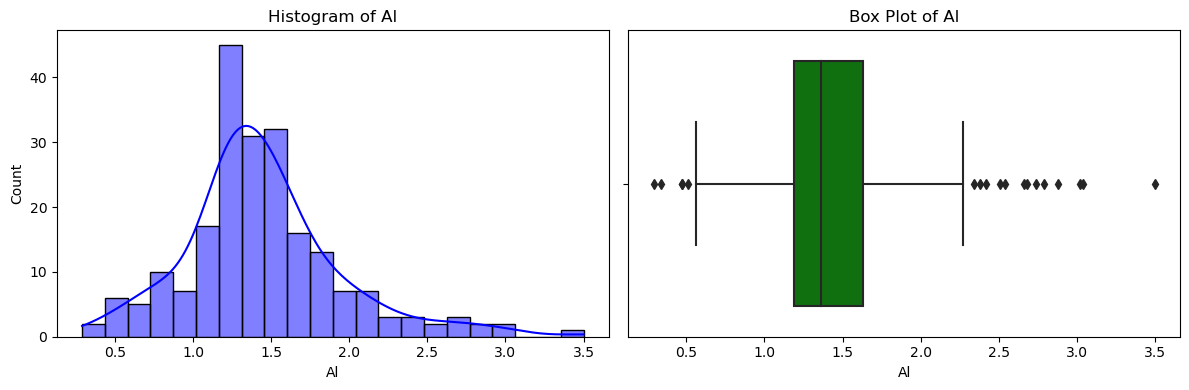

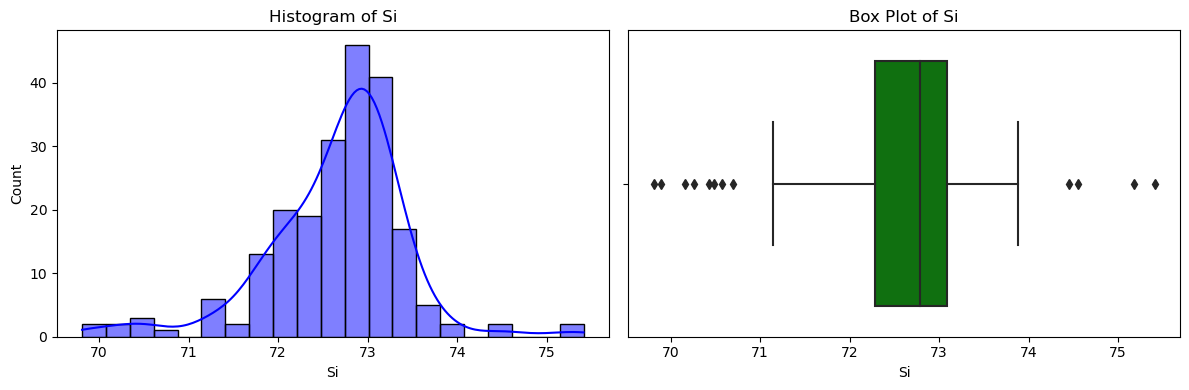

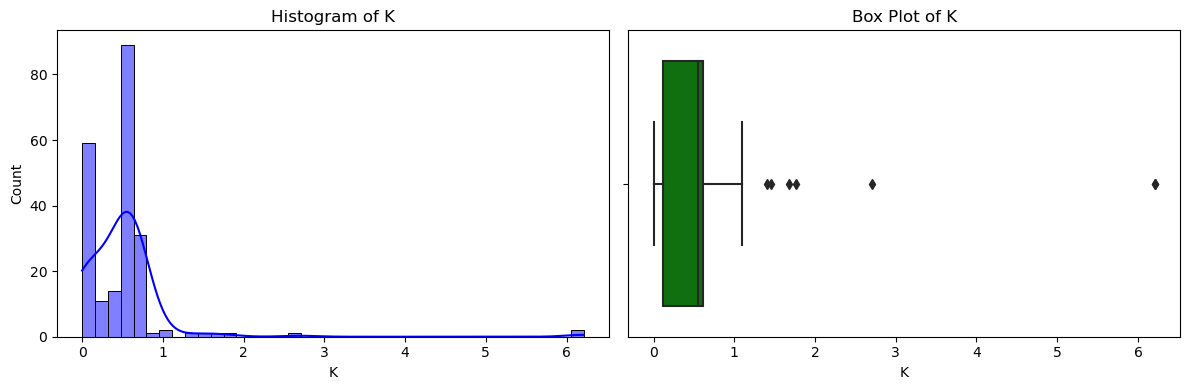

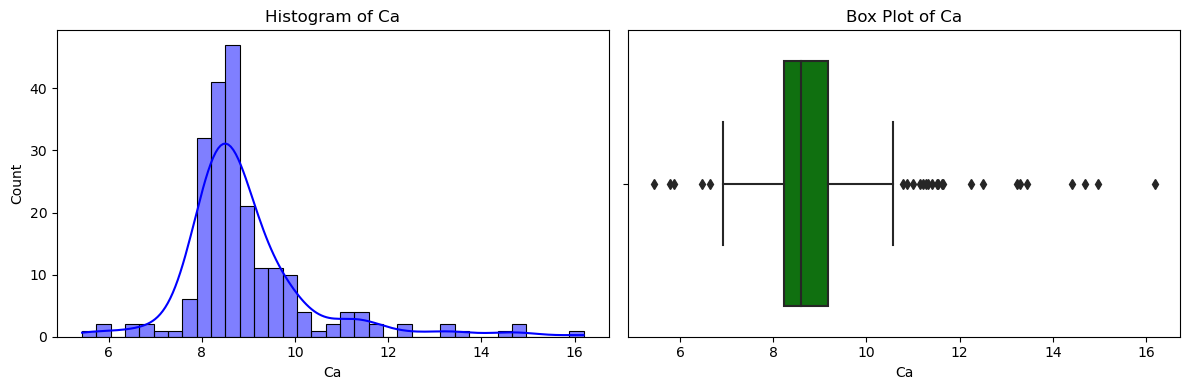

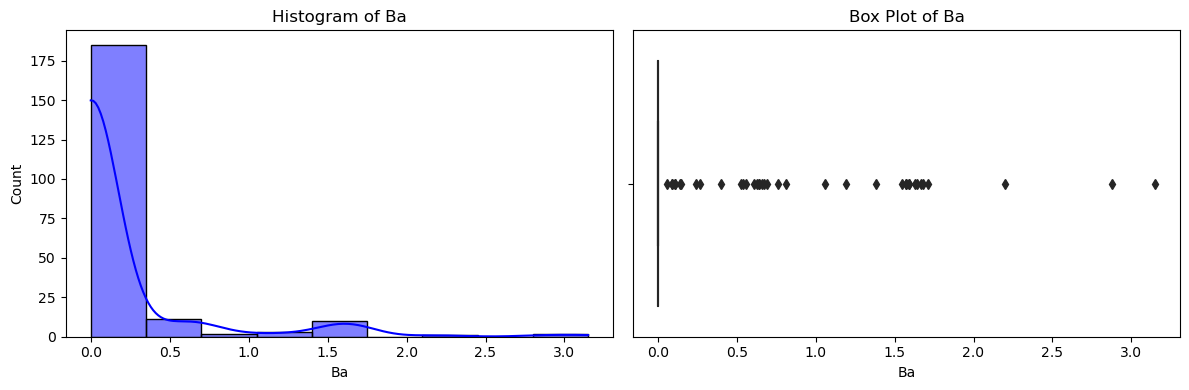

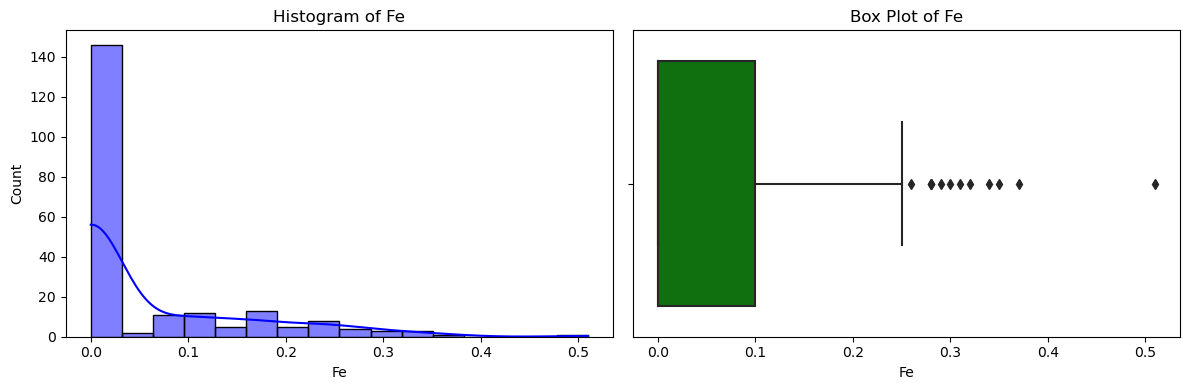

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = [ 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

for column in columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Histogram
    sns.histplot(df[column], ax=axes[0], kde=True, color='blue')
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)

    # Box Plot
    sns.boxplot(x=df[column], ax=axes[1], color='green')
    axes[1].set_title(f'Box Plot of {column}')
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

**Observations of Visualisations:-**

According to visualisations there are outliers however the presence of potential outliers might not have a significant impact on the classification task itself.So i will be keeping the outliers.

**Using Random forrest for multiclass classification**

/Users/siddhant/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/siddhant/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/siddhant/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


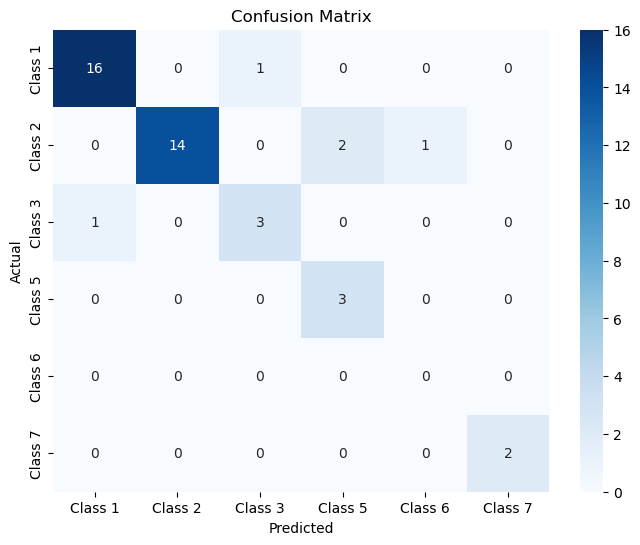

Accuracy: 0.8837209302325582
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        17
           2       1.00      0.82      0.90        17
           3       0.75      0.75      0.75         4
           5       0.60      1.00      0.75         3
           6       0.00      0.00      0.00         0
           7       1.00      1.00      1.00         2

    accuracy                           0.88        43
   macro avg       0.72      0.75      0.72        43
weighted avg       0.93      0.88      0.90        43



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Define features (X) and target variable (y)
X = df.drop(columns=['Type'])
y = df['Type']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200,random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 5', 'Class 6', 'Class 7'],
            yticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 5', 'Class 6', 'Class 7'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print metrics
print(f'Accuracy: {accuracy}')
plt.show()
print(f'Classification Report:\n{classification_rep}')


**Performing a 10-fold Cross-validation to verify the score of model on  unseed data**

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=10)

# Print the cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Accuracy: {cv_scores.mean()}')
print(f'Standard Deviation: {cv_scores.std()}')


/Users/siddhant/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Cross-Validation Scores: [0.63636364 0.72727273 0.81818182 0.68181818 0.71428571 0.9047619
 0.9047619  0.52380952 0.80952381 0.80952381]
Mean Accuracy: 0.7530303030303029
Standard Deviation: 0.11404461811834586


Class 1 - ROC AUC: 0.98
Class 2 - ROC AUC: 0.93
Class 3 - ROC AUC: 0.97
Class 5 - ROC AUC: 1.00
Class 6 - ROC AUC: nan
Class 7 - ROC AUC: 1.00


/Users/siddhant/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


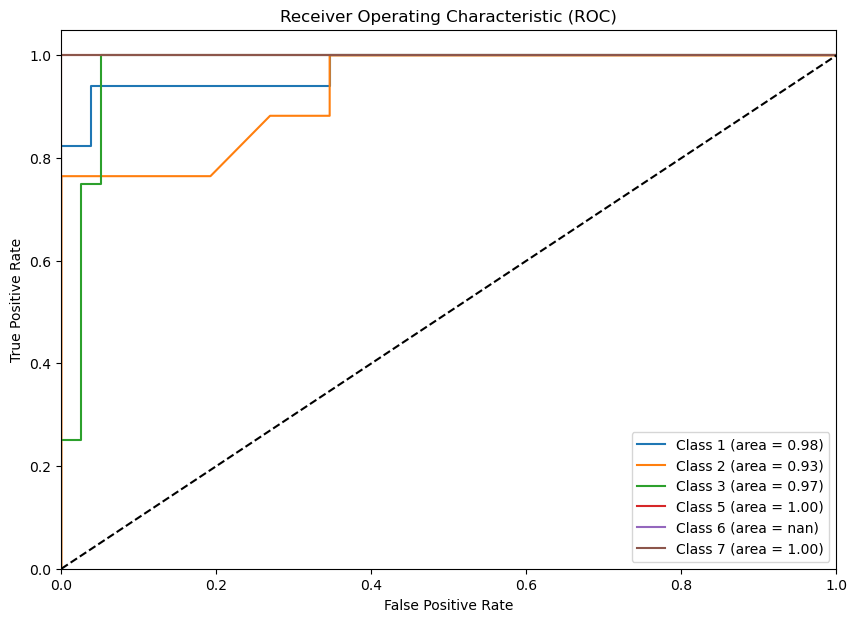

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_prob = rf_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(rf_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == rf_classifier.classes_[i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(len(rf_classifier.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {rf_classifier.classes_[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Print ROC AUC values
for i in range(len(rf_classifier.classes_)):
    print(f'Class {rf_classifier.classes_[i]} - ROC AUC: {roc_auc[i]:.2f}')


plt.show()


**Observation of plots**

* Class 6 (ROC AUC: nan): The ROC AUC value for Class 6 is reported as "nan", which means that there may not be enough data to calculate the ROC AUC for this class.

* Overall, it seems like your model is performing very well, especially for Classes 1, 3, 5, and 7. 

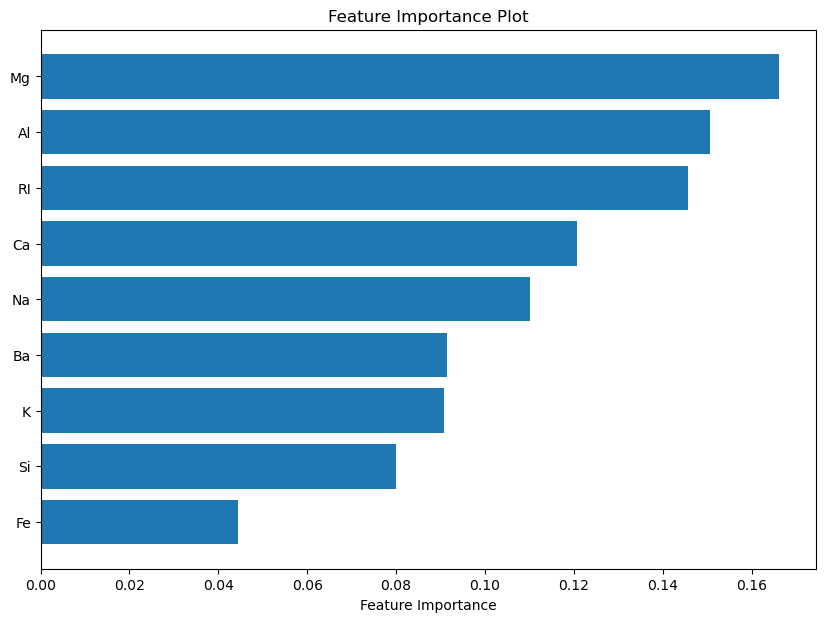

In [24]:
# Get feature importances
feature_importance = rf_classifier.feature_importances_

# Get the names of the features
feature_names = X.columns

sorted_idx = feature_importance.argsort()

# Sort feature importances in descending order
#sorted_idx = feature_importance.argsort()[::-1]

# Create a bar plot
plt.figure(figsize=(10, 7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()


# Conclusions:-



* Mg (Magnesium): This feature has the highest importance score (0.166). This suggests that Magnesium is the most influential feature in making predictions for your model. Changes in the Magnesium content have a significant impact on the outcome.

* Al (Aluminum): Aluminum is the second most important feature with an importance score of 0.151. It is a strong contributor to the model's predictions. Changes in Aluminum content have a notable effect on the outcome.

* RI (Refractive Index): Refractive Index is the third most important feature with an importance score of 0.146. This suggests that RI plays a substantial role in the model's predictions.